<a href="https://colab.research.google.com/github/jmins33/Seaborn/blob/master/seaborn_tutorial/seaborn_tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing statistical relationships

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Relating variables with scatter plots
- 두 변수가 모두 숫자 일 때 사용해야하는 가장 기본적인 것은 scatterplot()함수
- The scatterplot() is the default kind in relplot()
- it can also be forced by setting kind="scatter"

In [2]:
drink = pd.read_table('http://bit.ly/drinksbycountry', sep=',')
drink

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [3]:
drink_Asia = drink[drink.continent=='Asia']

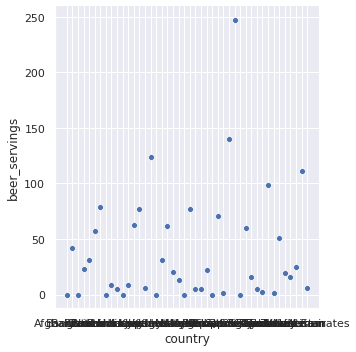

In [4]:
sns.relplot(x='country',y='beer_servings', data=drink_Asia)

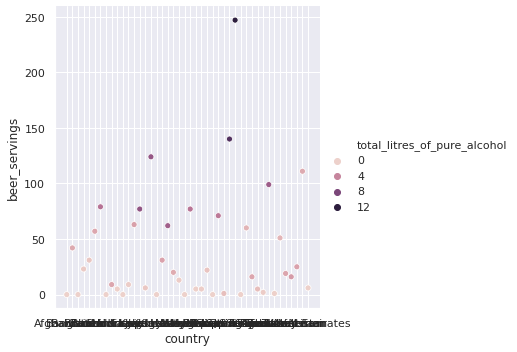

In [5]:
sns.relplot(x='country',y='beer_servings', hue='total_litres_of_pure_alcohol', data=drink_Asia)

- 데이터가 이후 튜토리얼에 적합하지 않아, tip 데이터도 섞어서 가져다 쓰려고 함.

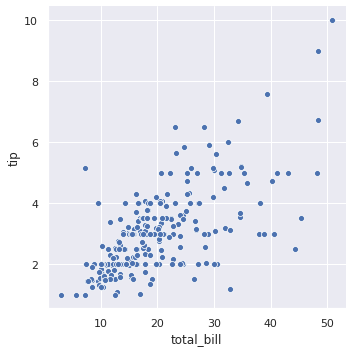

In [6]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

- x, y : names of variables in data x축,y축 데이터
 + Input data variables; must be **numeric.**
- hue : name in data, optional
 + Grouping variable that will produce elements with different colors. Can be either **categorical or numeric**, although color mapping will behave differently in latter case. 
- style : name in data, optional
 + Grouping variable that will produce elements with different styles. Can have a **numeric dtype but** will always be treated as **categorical.**

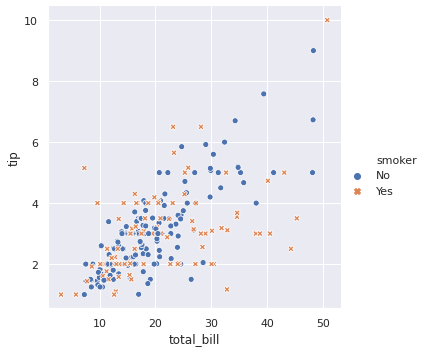

In [7]:
sns.relplot(x="total_bill", y="tip", hue='smoker', style='smoker', data=tips)

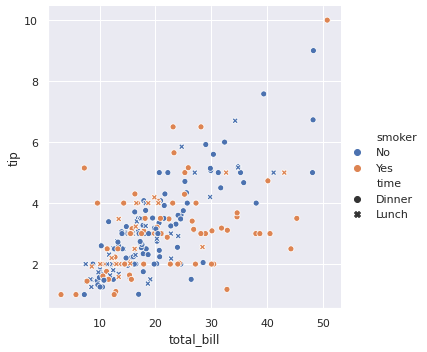

In [8]:
sns.relplot(x="total_bill", y="tip", hue='smoker', style='time', data=tips)

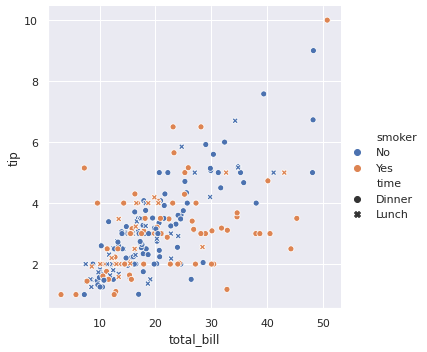

In [11]:
sns.relplot(x='total_bill', y='tip', hue='smoker',style='time', data=tips)

- size : **name** in data, optional
 + Grouping variable that will produce elements with **different sizes**. Can be either **categorical or numeric**, although size mapping will behave differently in latter case.
- palette : **palette name**, list, or dict, optional
 + Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.
- sizes : **list, dict, or tuple**, optional
 + An object that determines *how sizes are chosen when size is used*. It can always be a list of size values or a dict mapping levels of the size variable to sizes. When size is numeric, it can also be a tuple specifying the minimum and maximum size to use such that other values are normalized within this range.

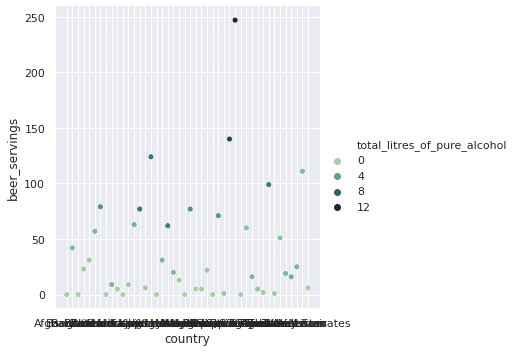

In [12]:
sns.relplot(x='country',y='beer_servings', hue='total_litres_of_pure_alcohol', palette="ch:r=-.5,l=.75", data=drink_Asia)

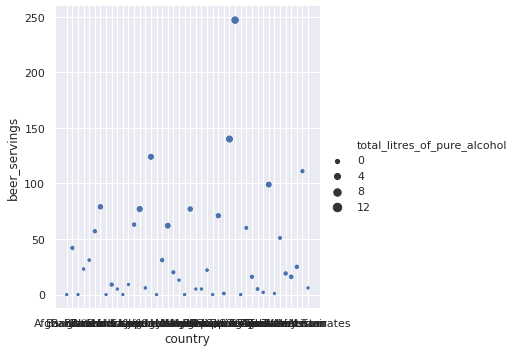

In [13]:
sns.relplot(x='country',y='beer_servings', size='total_litres_of_pure_alcohol', data=drink_Asia)

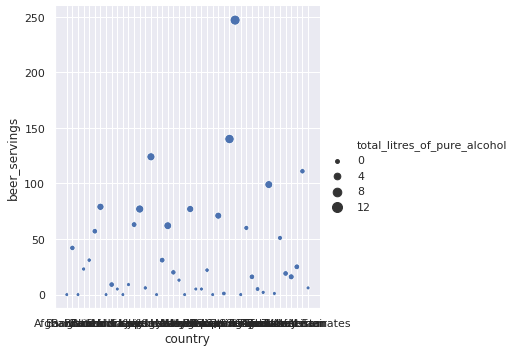

In [14]:
sns.relplot(x='country',y='beer_servings', size='total_litres_of_pure_alcohol', sizes=(15,100), data=drink_Asia)

# Emphasizing continuity with line plots
- you may want to understand changes in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a line plot.

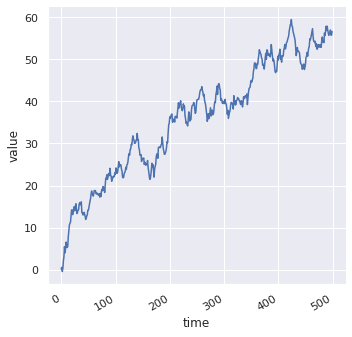

In [15]:
df = pd.DataFrame(dict(time=np.arange(500), value=np.random.randn(500).cumsum()))
g = sns.relplot(x='time', y='value', kind='line', data=df)
g.fig.autofmt_xdate()

- the default behavior is to sort the data by the x values before plotting. However, this can be disabled.
- sort : **boolean**, optional
If ***True, the data will be sorted by the x and y variables***, otherwise lines will connect points in the order they appear in the dataset.

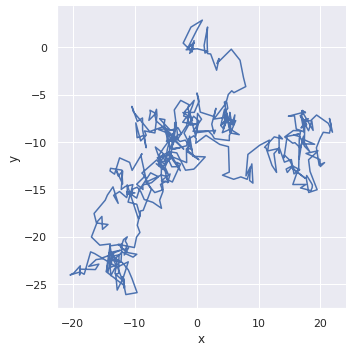

In [16]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df)

# Aggregation and representing uncertainty
- More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean.
- 평균과 평균 주위에 95 % 신뢰 구간을 플로팅하여 각 값에서 여러 측정 값을 집계.

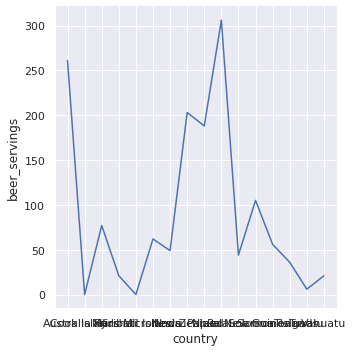

In [19]:
drink_Oceania = drink[drink.continent=='Oceania']
sns.relplot(x='country',y='beer_servings', kind='line',data=drink_Oceania)

- 신뢰구간이 안 보여 튜토리얼에 나온 데이터를 같이 사용하기로 함.

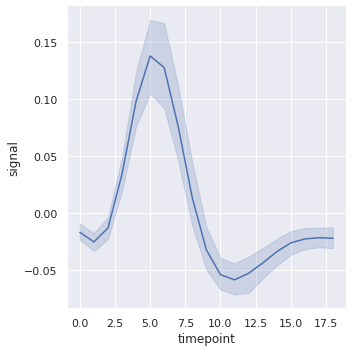

In [22]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)

- The confidence intervals are computed using bootstrapping, which can be time-intensive for larger datasets. It’s therefore possible to disable them.

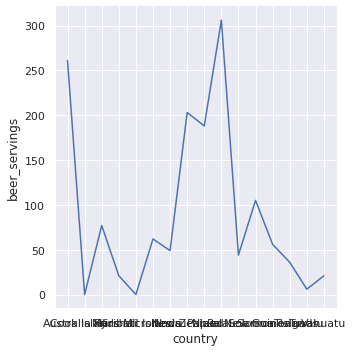

In [20]:
sns.relplot(x='country',y='beer_servings', ci=None, kind='line',data=drink_Oceania)

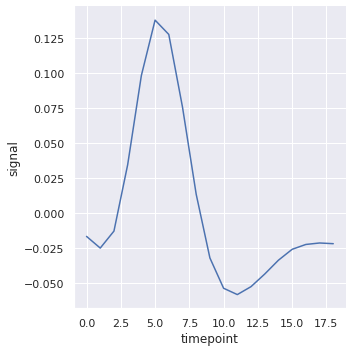

In [23]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri)

- Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval.
- 더 큰 데이터의 경우 또 다른 좋은 옵션은 신뢰 구간 대신 표준 편차를 플로팅하여 각 시점에서 분포의 산포를 나타내는 것입니다.

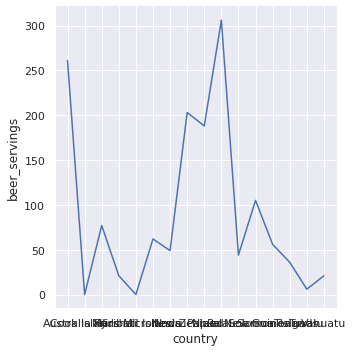

In [21]:
sns.relplot(x='country',y='beer_servings', kind='line',ci='sd', data=drink_Oceania)

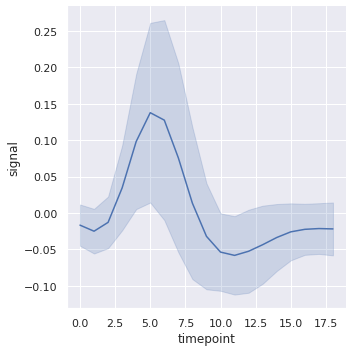

In [24]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri)

- To turn off aggregation altogether, set the estimator parameter to None This might produce a strange effect when the data have multiple observations at each point.
- 데이터에 각 지점에서 여러 관측치가 있는 경우 estimator매개 변수를 None으로 설정.

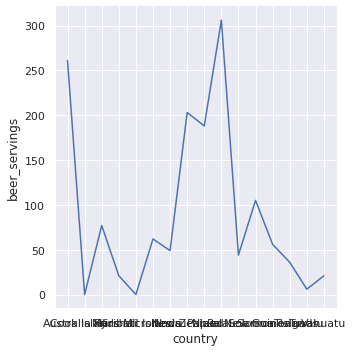

In [25]:
sns.relplot(x='country',y='beer_servings', estimator=None, kind='line',ci='sd', data=drink_Oceania)

- ci : int or “sd” or None, optional
 + Size of the confidence interval to draw when aggregating with an estimator. “sd” means to draw the standard deviation of the data. Setting to None will skip bootstrapping.
- 데이터를 아무래도 잘못 가져온 듯 하다. 이후부터는 그냥 튜토리얼에 있는 데이터를 쓰려고 한다...

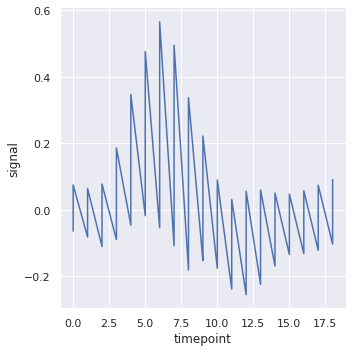

In [26]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri)

# Plotting subsets of data with semantic mappings
- Using semantics in lineplot() will also determine how the data get aggregated. For example, adding a hue semantic with two levels splits the plot into two lines and error bands, coloring each to indicate which subset of the data they correspond to.
- 데이터가 집계되는 방식도 결정됩니다. 예를 들어, 두 수준의 색조 의미 체계를 추가하면 플롯이 두 개의 선과 오차 대역으로 분할되고, 각각에 해당하는 데이터의 하위 집합을 나타 내기 위해 색상이 지정됩니다.

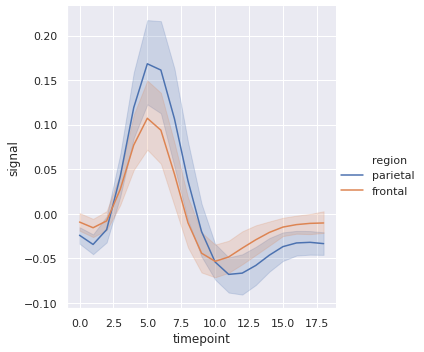

In [29]:
sns.relplot(x="timepoint", y="signal", hue="region", kind="line", data=fmri)

- 선 플롯에 스타일 의미를 추가하면 기본적으로 선의 대시 패턴이 변경됩니다.

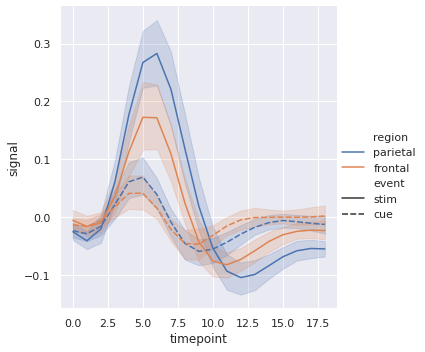

In [31]:
sns.relplot(x="timepoint", y="signal", hue="region", style='event', kind="line", data=fmri)

- you can identify subsets by the markers used at each observation, either together with the dashes or instead of them.

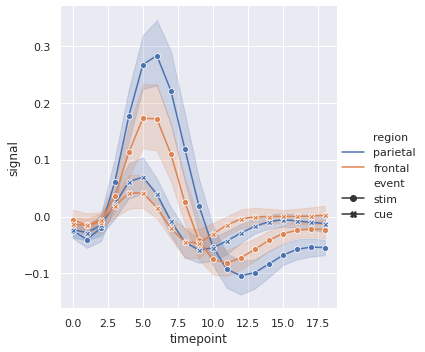

In [32]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",dashes=False, markers=True, kind="line", data=fmri)

- 때때로 유익하지만, 구문 분석과 해석도 어려울 수 있다. 그러나 추가 변수에 대한 변경 사항만 검사할 경우에도 선의 색상과 스타일을 모두 변경하는 것이 유용할 수 있다.

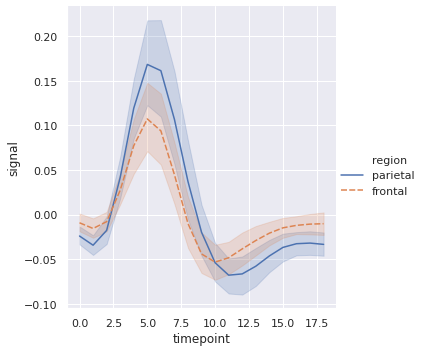

In [33]:
sns.relplot(x="timepoint", y="signal", hue="region", style='region', kind="line", data=fmri)

- 반복 측정 데이터(즉, 여러 번 샘플링된 단위가 있는 경우)로 작업할 때 의미론을 통해 각 샘플링 단위를 구분하지 않고 개별적으로 플로팅할 수도 있다.
- units : {long_form_var}
 + Grouping variable identifying sampling units. When used, a separate line will be drawn for each unit with appropriate semantics, but no legend entry will be added. Useful for showing distribution of experimental replicates when exact identities are not needed.

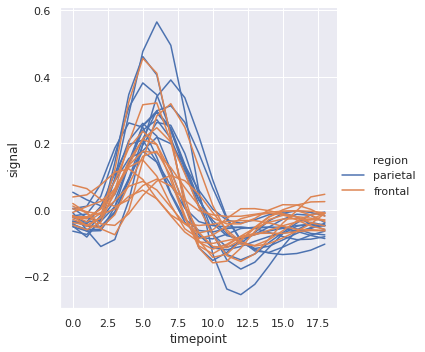

In [34]:
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"));

- The default colormap and handling of the legend in lineplot() also depends on whether the hue semantic is categorical or numeric.

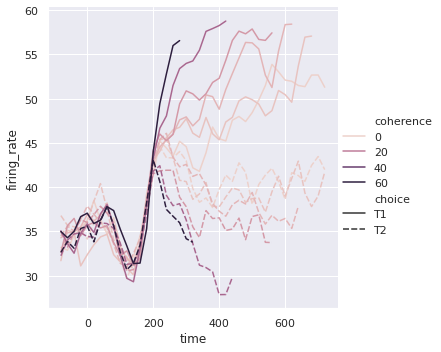

In [35]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots)

- hue variable is numeric, it is poorly represented by a linear color scale. That’s the case here, where the levels of the hue variable are logarithmically scaled. You can provide specific color values for each line by passing a list or dictionary.

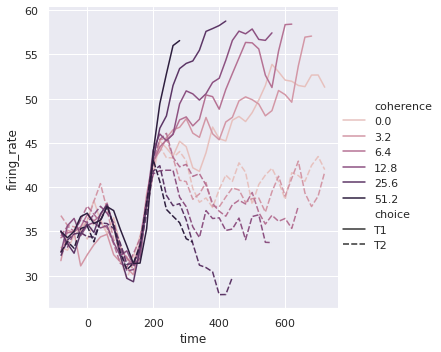

In [36]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            palette=palette,
            kind="line", data=dots)

- Or you can alter how the colormap is normalized

In [40]:
from matplotlib.colors import LogNorm

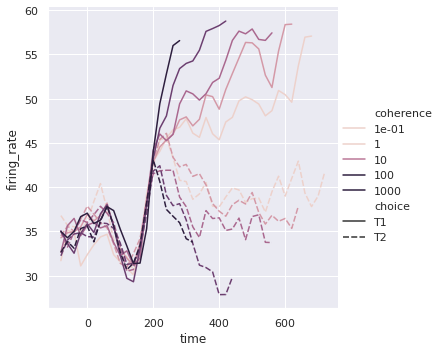

In [41]:
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(x='time', y='firing_rate',
            hue='coherence', style='choice',
            hue_norm=LogNorm(),
            kind='line', data=dots)

- palette 없이

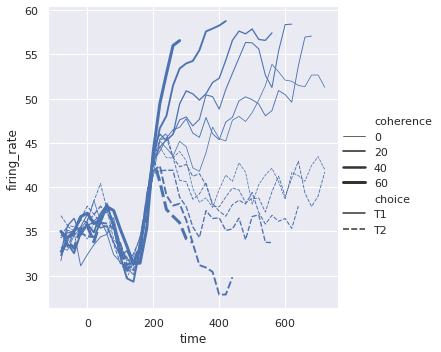

In [42]:
sns.relplot(x="time", y="firing_rate",
            size="coherence", style="choice",
            kind="line", data=dots)

- palette를 파라미터에 넣어도 된다.

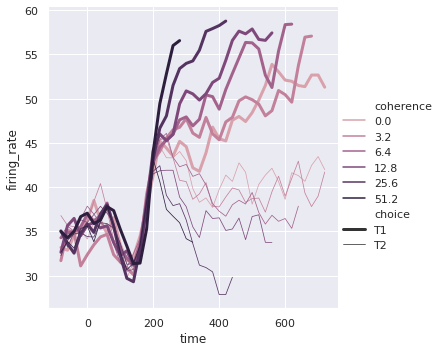

In [43]:
sns.relplot(x="time", y="firing_rate",
           hue="coherence", size="choice",
           palette=palette,
           kind="line", data=dots)

# Plotting with date data
- Line plots are often used to visualize data associated with real dates and times.

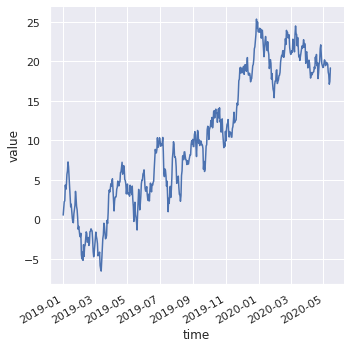

In [47]:
df = pd.DataFrame(dict(time=pd.date_range('2019-01-01', periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x='time',y='value',kind='line', data=df)
g.fig.autofmt_xdate()

# Showing multiple relationships with facets
- 두 변수 사이의 관계가 두 변수 이상의 다른 변수에 어떻게 의존하는지 이해하고 싶을 때는 둘 이상의 플롯을 만드는 것이 방법일 수 있다.
- relplot()은 FacetGrid를 기반으로 한다. 
- 추가 변수의 영향을 표시하려면 해당 변수를 그래프의 의미 역할 중 하나에 할당하는 대신 시각화를 "구획화"하는 데 사용하라. (여러 개의 축을 만들고 각 축에 데이터의 하위 집합을 표시)

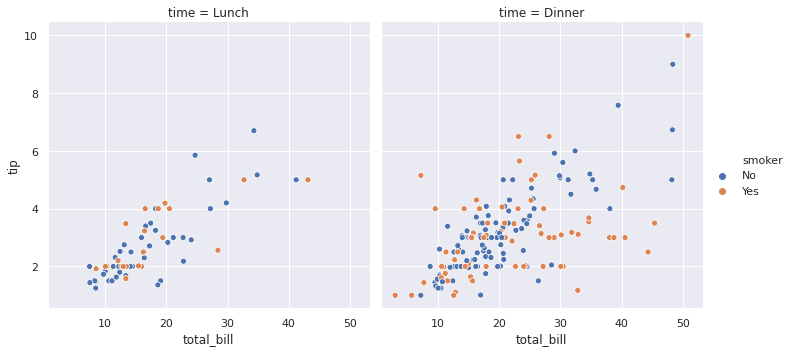

In [48]:
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)

- row, col :names of variables in data, optional
 + Categorical variables that will determine the faceting of the grid.
- You can also show the influence two variables this way: one by faceting on the columns and one by faceting on the rows.
- As you start adding more variables to the grid, you may want to decrease the figure size. Remember that the size FacetGrid is parameterized by the height and aspect ratio of each facet

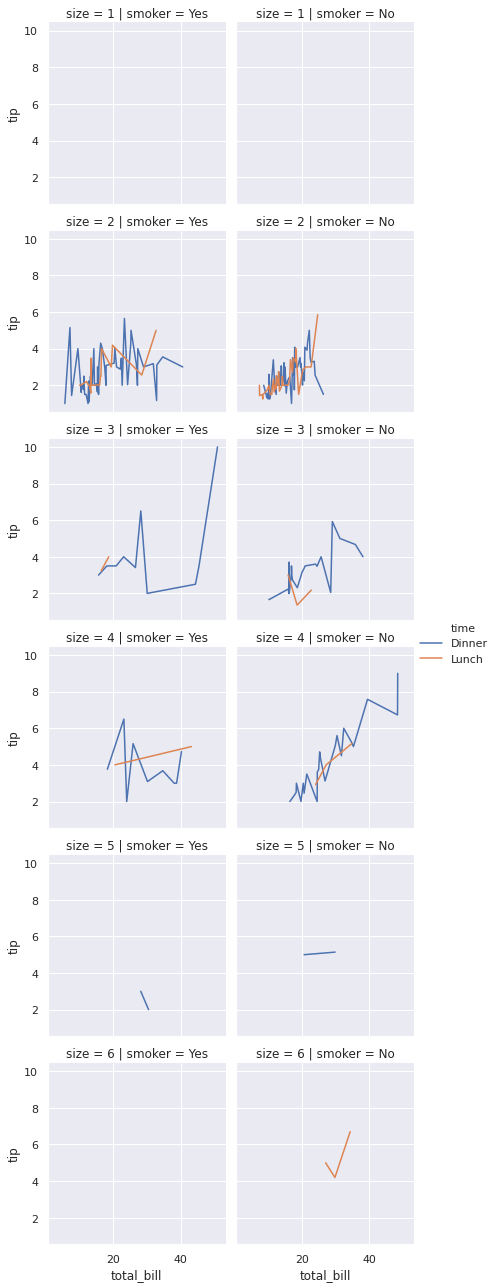

In [52]:
sns.relplot(x="total_bill", y="tip", hue="time",
            col="smoker", row="size", height=3,
            kind="line", estimator=None, data=tips)

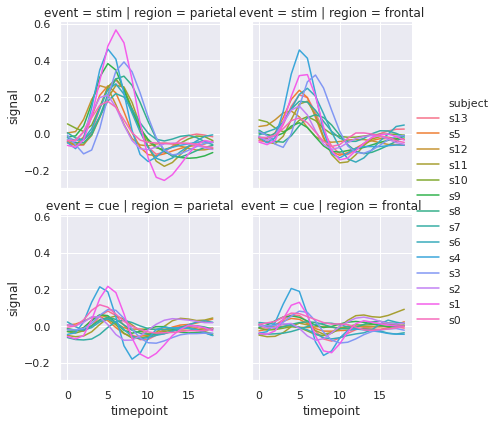

In [51]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri)

- When you want to examine effects across many levels of a variable, it can be a good idea to facet that variable on the columns and then “wrap” the facets into the rows.
- col_wrap : int, optional
  + 'Wrap' the column variable at this width, so that the column facets span multiple rows. Incompatible with a row facet.

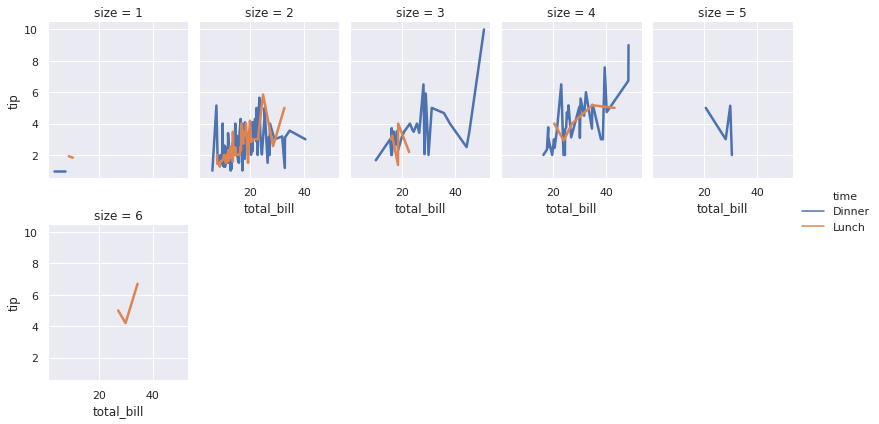

In [53]:
sns.relplot(x="total_bill", y="tip", hue="time",
            col="size", col_wrap=5, height=3,
            aspect=.75, linewidth=2.5,
            kind="line", estimator=None, data=tips)

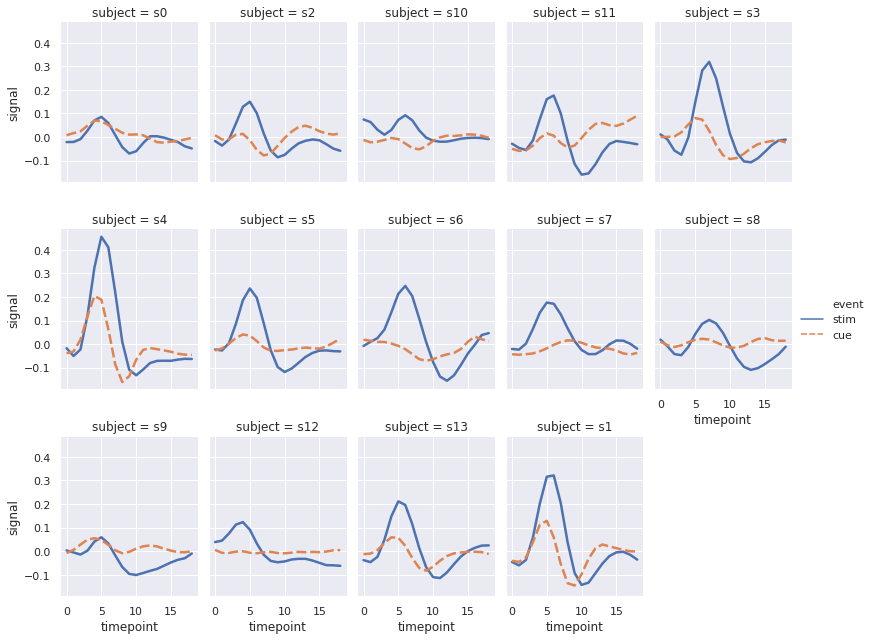

In [54]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"))

- 이러한 시각화는 전체적인 패턴과 그 패턴으로부터의 편차를 모두 눈으로 쉽게 감지할 수 있는 형식으로 데이터를 제시하기 때문에 매우 효과적이다. 
- 우리는 scatterplot() 와 relplot()이 제공하는 유연성을 활용해야 하지만, 여러 개의 간단한 플롯이 일반적으로 하나의 복잡한 플롯보다 더 효과적이라는 것을 항상 명심하자.